<a href="https://colab.research.google.com/github/UdayKumar9381/Machine_learning.ybi/blob/main/MACHINE_LEARNING_HAND_WRITTEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*HAND WRITTEN DIGIT PREDICTION *

***IMPORT LIBRARY***

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**IMPORT DATA**

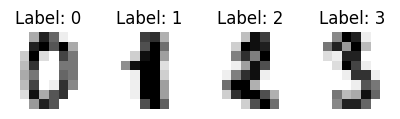

In [12]:



fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(5, 1))

df = load_digits()
for ax, image, label in zip(axes, df.data[:6], df.target[:6]):
    ax.set_axis_off()
    ax.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {label}")

plt.show()


DATA PREPROCESSING

Flatten image


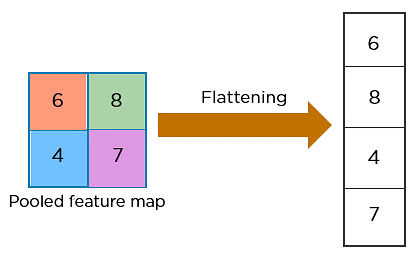

In [14]:
df.images.shape

(1797, 8, 8)

In [16]:
df.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [17]:
df.images[1].shape

(8, 8)

In [18]:
len(df.images)

1797

In [19]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [20]:
data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [22]:
data[6].shape

(64,)

In [23]:
data.shape

(1797, 64)

**SCALING IMAGE DATA**

In [25]:
data.min()

0.0

In [26]:
data.max()

16.0

In [27]:
data = data/16

In [29]:
data.min()

0.0

In [30]:
data.max()

1.0

In [31]:
data[1]

array([0.    , 0.    , 0.    , 0.75  , 0.8125, 0.3125, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.6875, 1.    , 0.5625, 0.    , 0.    ,
       0.    , 0.    , 0.1875, 0.9375, 1.    , 0.375 , 0.    , 0.    ,
       0.    , 0.4375, 0.9375, 1.    , 1.    , 0.125 , 0.    , 0.    ,
       0.    , 0.    , 0.0625, 1.    , 1.    , 0.1875, 0.    , 0.    ,
       0.    , 0.    , 0.0625, 1.    , 1.    , 0.375 , 0.    , 0.    ,
       0.    , 0.    , 0.0625, 1.    , 1.    , 0.375 , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.6875, 1.    , 0.625 , 0.    , 0.    ])

**Train Test Split Data **

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from re import X
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.2)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

**RANDOM FOREST MODEL**

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier()

In [37]:
rf.fit(X_train, y_train)

RandomForestClassifier()

**PREDICT TEST DATA**

In [38]:
y_pred = rf.predict(X_test)

In [39]:
y_pred

array([8, 9, 0, 9, 3, 4, 7, 0, 0, 1, 2, 7, 0, 9, 7, 7, 5, 0, 7, 7, 5, 3,
       6, 8, 0, 3, 0, 0, 5, 5, 9, 0, 9, 9, 4, 1, 1, 9, 6, 1, 6, 3, 5, 3,
       7, 4, 3, 7, 8, 0, 4, 6, 7, 3, 1, 9, 9, 7, 8, 6, 1, 2, 6, 4, 3, 3,
       2, 5, 3, 0, 3, 8, 9, 9, 0, 5, 0, 7, 9, 5, 9, 7, 3, 3, 6, 4, 6, 8,
       5, 0, 4, 8, 4, 8, 3, 4, 1, 2, 7, 6, 3, 7, 4, 2, 7, 1, 5, 9, 6, 2,
       3, 2, 7, 4, 3, 1, 4, 8, 8, 3, 2, 0, 7, 8, 4, 4, 5, 9, 8, 8, 7, 7,
       8, 1, 7, 1, 9, 5, 0, 3, 5, 5, 7, 7, 7, 9, 3, 9, 2, 1, 2, 0, 4, 0,
       3, 2, 9, 0, 7, 7, 5, 5, 3, 7, 2, 1, 9, 5, 3, 4, 1, 5, 4, 2, 2, 6,
       7, 7, 4, 4, 4, 8, 1, 1, 0, 8, 6, 0, 3, 0, 0, 7, 1, 8, 1, 4, 0, 5,
       3, 9, 6, 7, 1, 4, 0, 0, 2, 7, 9, 0, 3, 0, 5, 9, 2, 0, 0, 7, 1, 9,
       0, 1, 4, 3, 2, 2, 8, 4, 3, 7, 8, 9, 6, 2, 6, 1, 7, 8, 2, 2, 4, 2,
       1, 5, 6, 8, 3, 2, 3, 4, 3, 8, 9, 1, 9, 1, 4, 5, 2, 8, 6, 1, 5, 5,
       7, 4, 9, 2, 3, 3, 0, 6, 2, 5, 9, 1, 7, 2, 5, 9, 3, 9, 5, 2, 6, 1,
       0, 5, 5, 7, 6, 3, 2, 9, 9, 0, 7, 7, 5, 0, 8,

**MODEL ACCURACY**

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
confusion_matrix(y_test, y_pred)

array([[38,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 25,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 41,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 35]])

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.97      1.00      0.98        32
           2       1.00      1.00      1.00        40
           3       0.98      0.91      0.94        45
           4       0.94      0.94      0.94        32
           5       0.95      1.00      0.97        35
           6       1.00      0.96      0.98        26
           7       0.91      0.98      0.94        42
           8       1.00      0.97      0.98        32
           9       0.97      0.95      0.96        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

